### 1. Importing data and libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = 'C:/Users/hnguy/OneDrive/Documents/Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ratings_data_cleaned.csv'))

In [4]:
df.columns

Index(['Company/Creator', 'Specific Bean Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Broad Bean Origin'],
      dtype='object')

In [5]:
df.drop(columns = ["Company/Creator", "Specific Bean Origin", "REF", "Cocoa Percent", "Company Location", "Broad Bean Origin"], inplace=True)

In [6]:
df.head()

,Review Date,Rating
0,2016,3.75
1,2015,2.75
2,2015,3.00
3,2015,3.50
4,2015,3.50


### 2. Subsetting, wrangling, and cleaningg time-series data

In [7]:
df_sub = df.set_index('Review Date')
df_sub.head()

,Rating
Review Date,
2016,3.75
2015,2.75
2015,3.00
2015,3.50
2015,3.50


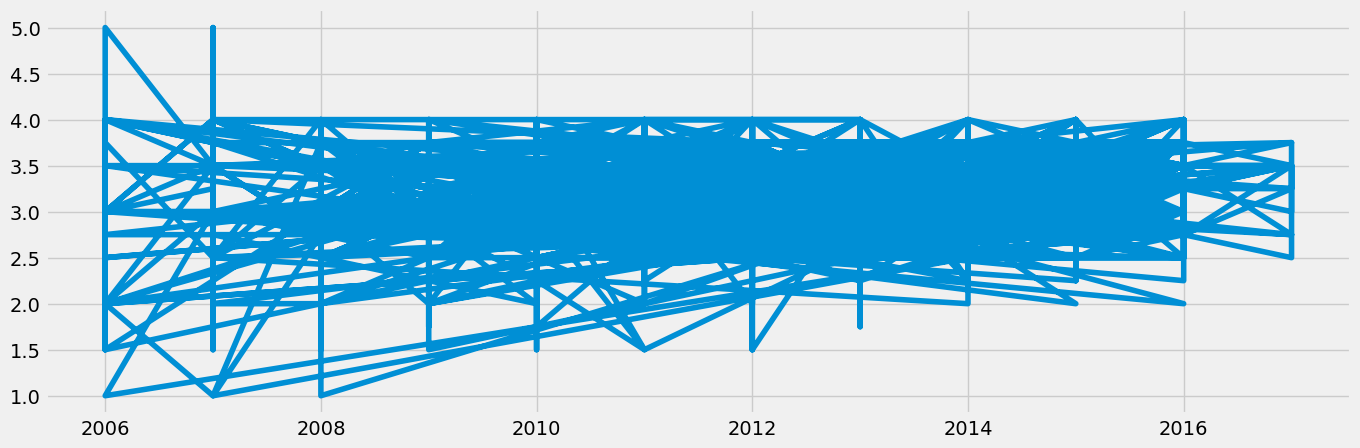

In [8]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [10]:
# Check for missing values (you shouldn't have any)

df_sub.isnull().sum() 

Rating    0
dtype: int64

In [11]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()



1782

In [16]:
df_new = df_sub.drop_duplicates()

In [17]:
df_new

,Rating
Review Date,
2016,3.75
2015,2.75
2015,3.00
2015,3.50
2014,4.00
2013,3.25
2013,2.50
2007,5.00
2010,1.75


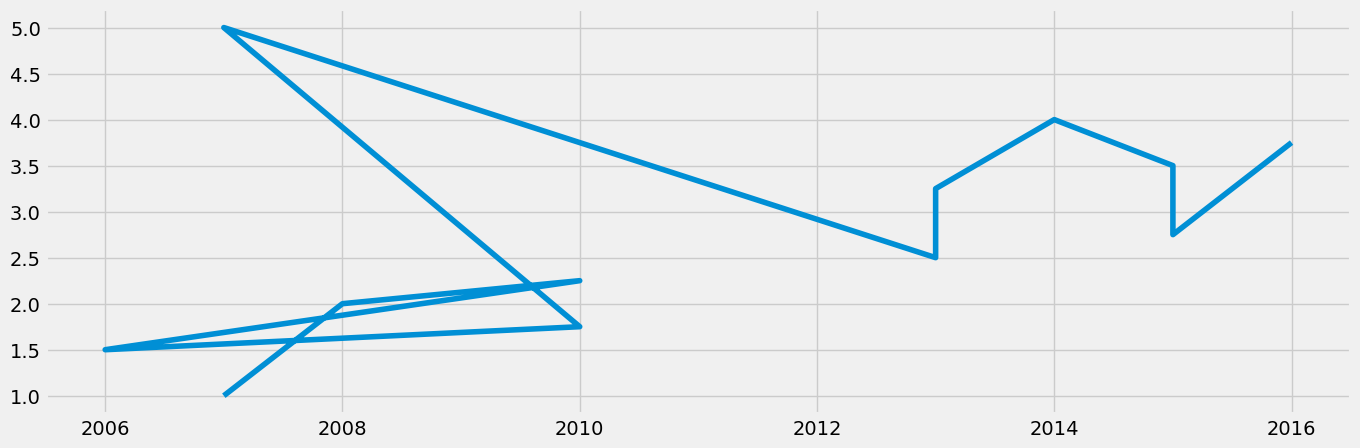

In [18]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_new)

### 3. Time-series analysis: decomposition

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_new, model='additive', period= 1)

In [23]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

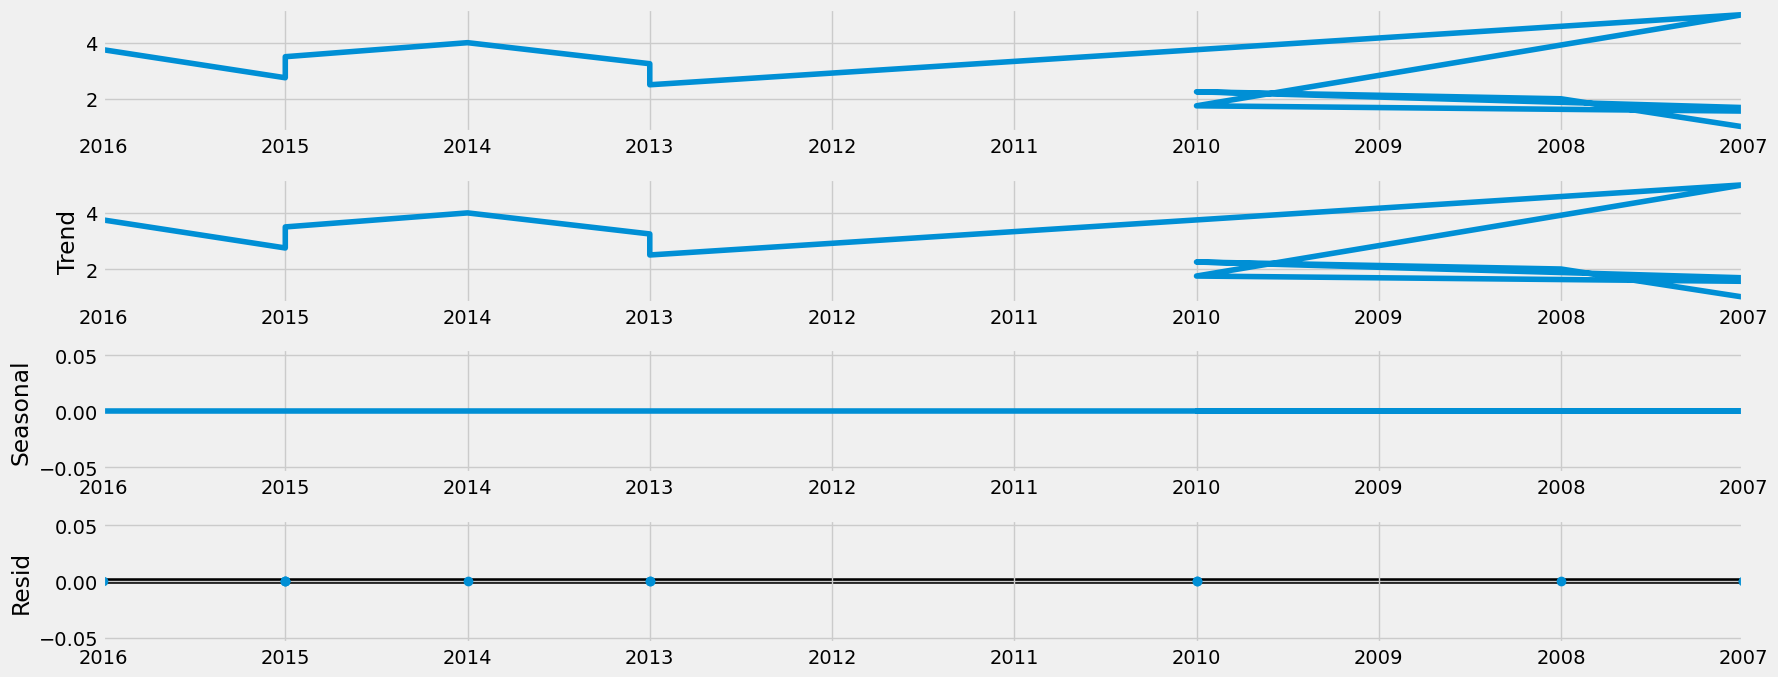

In [24]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [25]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_new['Rating'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.298768
p-value                         0.172366
Number of Lags Used             0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


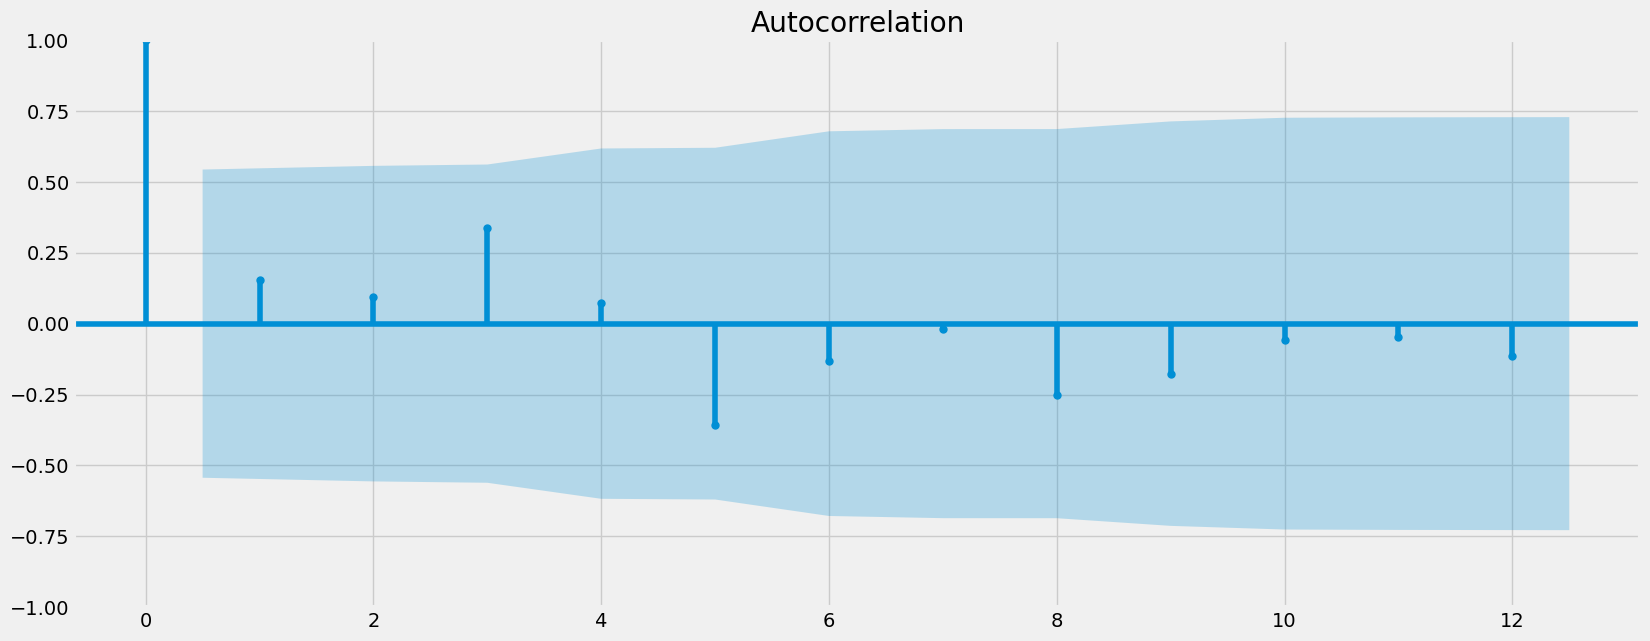

In [26]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_new)
plt.show()

### 5. Stationarizing the Data

In [28]:
data_diff = df_new - df_new.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [29]:
data_diff.dropna(inplace = True)

In [30]:
data_diff.head()

,Rating
Review Date,
2015,-1.00
2015,0.25
2015,0.50
2014,0.50
2013,-0.75


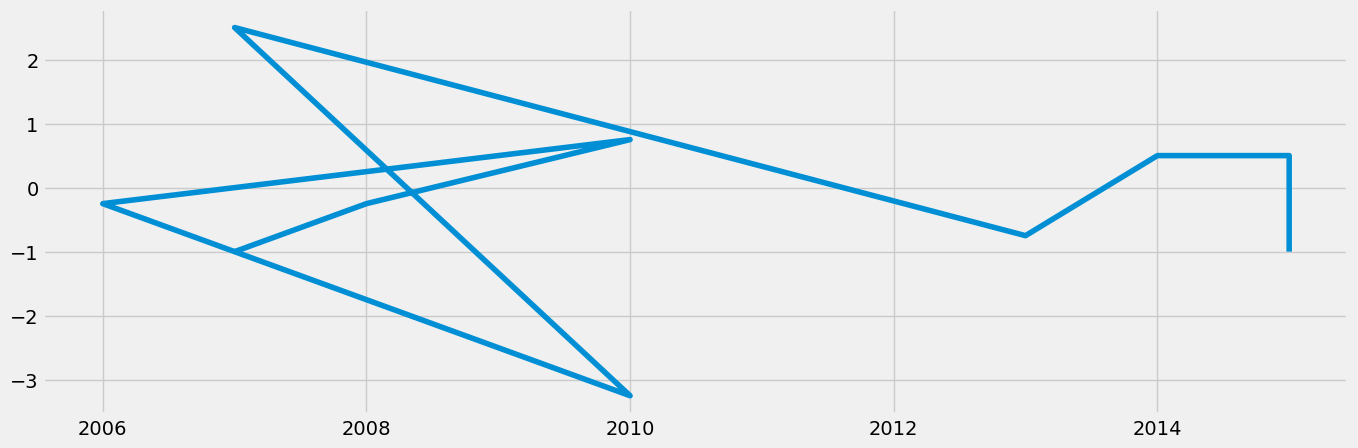

In [31]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [32]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -0.166227
p-value                        0.942429
Number of Lags Used            4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [33]:
data_diff2 = data_diff - data_diff.shift(1)

In [34]:
data_diff2.dropna(inplace = True)

In [35]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -3.603167
p-value                        0.005701
Number of Lags Used            3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


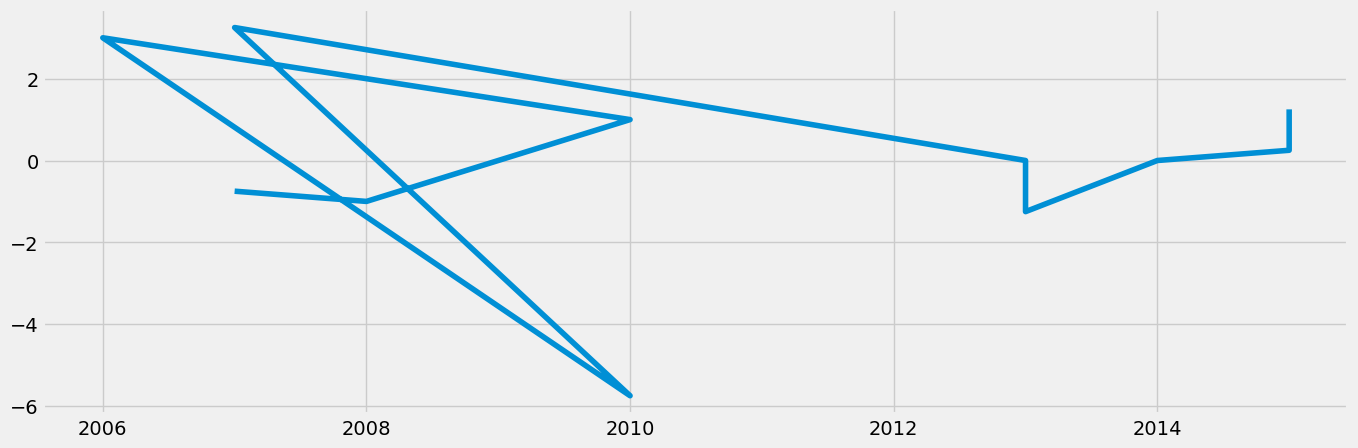

In [36]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)